In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import importlib
plt.rc('text', usetex=True)

from os import listdir
from os.path import isfile, join

In [20]:
############## Select device ################

device = 'fluxonium' # change here to change the device: charge_qubit, flopping_spin, flopping_charge, transmon, fluxonium

#############################################

data = np.load('../../data/params/'+device+'.npz', allow_pickle=True)
wq, g, kappa, dim, num_A = data['wq'], data['g'], data['kappa'], data['dim'], data['num_A']

In [21]:
###### List available file to be plotted ########

path = '../../data/'+device+'/single_case/'

for file in os.listdir(path):
    if file.endswith(".npz"):
        print(file)

#################################################

A_q=0.6_w_d=2.92_w_d_disp=2.92_N_fock=11_N_rep=5_n_states=8_dim=110_compensation=True_dispersive=False.npz
A_q=0.6_w_d=1.92_w_d_disp=1.92_N_fock=11_N_rep=5_n_states=8_dim=110_compensation=True_dispersive=False.npz


In [22]:
############# Select one set of parameters ################

A_q=0.6*wq
w_d = 1.92*wq
w_d_disp = 1.92*wq
n_states = 8
dim = 110
N_rep = 5
N_fock = 11
compensation = True
dispersive = False

###########################################################

In [23]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

fname = path+'A_q='+str(np.round(A_q/wq,3))+'_w_d='+str(np.round(w_d/wq,3))\
    +'_w_d_disp='+str(np.round(w_d_disp/wq,3))+'_N_fock='+str(N_fock)+'_N_rep='+str(N_rep)+'_n_states='+str(n_states)\
        +'_dim='+str(dim)+'_compensation='+str(compensation)+'_dispersive='+str(dispersive)

import_npz(fname+'.npz')

index_A = np.abs(A_list[0:(num_A-2)]-A_q).argmin()
print('derivatives of the spectrum computed in A_q/w_q='+str(A_list[index_A]/wq))

derivatives of the spectrum computed in A_q/w_q=0.6015189873417722


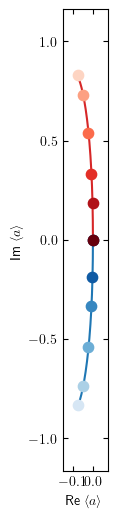

In [24]:
%matplotlib inline

x_list = [0,0.5,1,2,4,8]

norm = mpl.colors.Normalize(vmin=0, vmax=len(x_list))

cmap_b = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Blues'].reversed())
cmap_b.set_array([])

cmap_r = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.colormaps['Reds'].reversed())
cmap_r.set_array([])

cmap = [cmap_b, cmap_r]

fig, ax = plt.subplots(figsize=(6,6), dpi=100)

color = ['tab:blue','tab:red']

for q_idx,index in enumerate(qubit_state_list):
    ax.plot(exp_a_an[index].real,exp_a_an[index].imag, c=color[index], zorder=0)
    if dispersive:
        ax.plot(exp_a_disp_an[index].real,exp_a_disp_an[index].imag, c=color[index], ls='--', zorder=0)

    for ii,i in enumerate(x_list):
        idx = np.where(np.abs(tlist*kappa-i)<0.01)[0][0]
        ax.scatter(exp_a[index][idx].real, exp_a[index][idx].imag, color=cmap[q_idx].to_rgba(ii), s=55, zorder=1)
        if dispersive:
                ax.scatter(exp_a_disp[index][idx].real, exp_a_disp[index][idx].imag, color=cmap[q_idx].to_rgba(ii), s=55, zorder=1)

ax.set_xmargin(1)
ax.set_ymargin(0.2)

ax.xaxis.set_tick_params(direction="in", which='both')
ax.yaxis.set_tick_params(direction="in", which='both')

#ax.text(0.54,0.3,r'$\pmb{\left\vert + \right\rangle}$', ha='right', va='top', transform=ax.transAxes, color = 'tab:red', \
        #fontsize=16)
#ax.text(0.54,0.8,r'$\pmb{\left\vert - \right\rangle}$', ha='right', va='top', transform=ax.transAxes, color = 'tab:blue', \
        #fontsize=16)

ax.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax.set_xlabel(r'Re $\langle a \rangle$')
ax.set_ylabel(r'Im $\langle a \rangle$')

ax.set_aspect('equal')

(-0.01, 0.1)

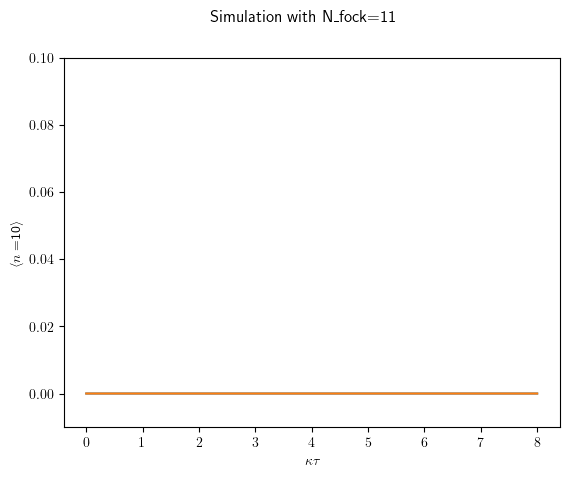

In [25]:
%matplotlib inline
fig, ax = plt.subplots()

fig.suptitle('Simulation with N_fock='+str(N_fock))

ax.plot(tlist*kappa, exp_fock[0,0])
ax.plot(tlist*kappa, exp_fock[0,1])

ax.set_xlabel(r'$\kappa\tau$')
ax.set_ylabel(r'$\langle n=$'+str(N_fock-1)+r'$\rangle$')

ax.set_ylim([-0.01,0.1])

(-0.01, 0.1)

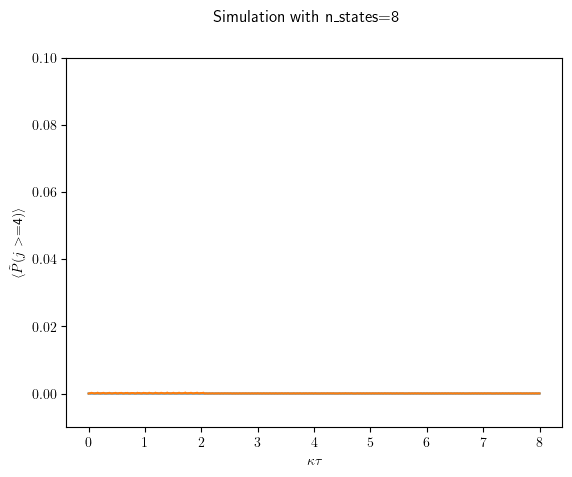

In [26]:
%matplotlib inline
fig, ax = plt.subplots()

fig.suptitle('Simulation with n_states='+str(n_states))

ax.plot(tlist*kappa, exp_proj[0,0])
ax.plot(tlist*kappa, exp_proj[0,1])

ax.set_xlabel(r'$\kappa\tau$')
ax.set_ylabel(r'$\langle \tilde{P}(j>=$'+str(n_states-4)+r'$)\rangle$')

ax.set_ylim([-0.01,0.1])